### Steps for CNN of ASL Dataset

Load ASL training and test datasets 
- don't know how to process the image from individual pixels to torch or matplotlib

Define a Convolutional Neural Network
- working on understand different parts of torch architecture steps

Define a loss function

Train the network on the training data

Test the network on the test data

Visualize # of each letter in datasets(Bar graph to show samples in each class)

Randomly generate 1 sample from each class

Show correctly classified and wrongly classified to show why some are easier to classify vs harder to classify

#### Dataset Origin 
https://www.kaggle.com/datamunge/sign-language-mnist

#### pytorch model inspiration
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

#### tensorflow model inspiration
https://github.com/BrianMH/ECE196_Demo/blob/master/CNN_Demo.ipynb

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# from tensorflow.keras.datasets import mnist

In [2]:
df_test = pd.read_csv('./sign_mnist_test.csv')
df_train = pd.read_csv('./sign_mnist_train.csv')

In [3]:
df_train.head() # shows first 5 entries in training dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [198]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels_train = df_train['label']
df_train = df_train.drop('label',axis = 1)

KeyError: 'label'

In [5]:
# #separate labels (letter classes) from test data set
#drop label from rest of pixels
labels_test = df_test['label']
df_test = df_test.drop('label',axis = 1)

In [6]:
# create dataframe with all labels to make a bargraph
frames = [labels_train,labels_test]
df_all_labels = pd.concat(frames)
print(df_all_labels.shape)
df_all_labels.head()

(34627,)


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

Text(0.5, 1.0, 'All data')

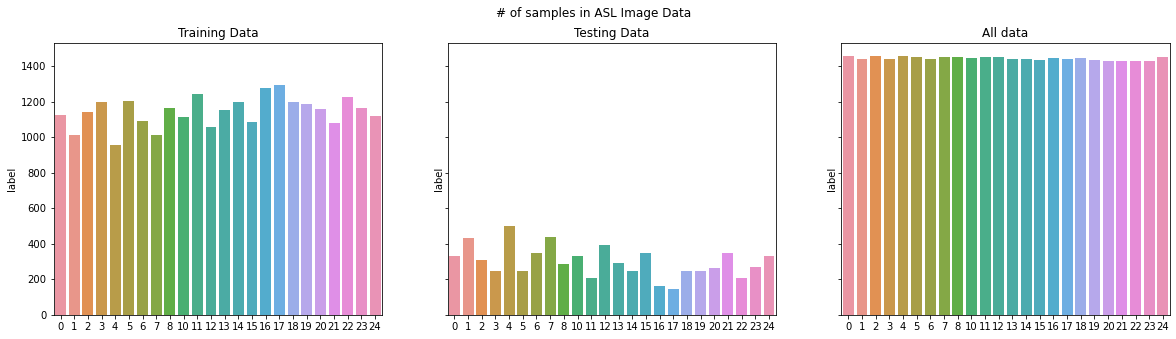

In [7]:
import seaborn as sns

'''Want to change so that 0,1,2,3 etc reads A,B,C,D etc'''
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('# of samples in ASL Image Data')

# Train data
sns.barplot(ax=axes[0], x=labels_train.value_counts().index, y=labels_train.value_counts())
axes[0].set_title('Training Data')

# Test Data
sns.barplot(ax=axes[1], x=labels_test.value_counts().index, y=labels_test.value_counts())
axes[1].set_title('Testing Data')

# Combined
sns.barplot(ax=axes[2], x=df_all_labels.value_counts().index, y=df_all_labels.value_counts())
axes[2].set_title('All data')

In [8]:
# convert pandas df to numpy array and reshape into 28x28 array as prep for picture
''' only relevant for following cell with random image display'''

np_train_img = df_train.to_numpy() #training dataset
np_train_img = np_train_img.reshape(np_train_img.shape[0],28,28)
np_test_img = df_test.to_numpy() # testing dataset
np_test_img = np_test_img.reshape(np_test_img.shape[0],28,28)




In [10]:
#convert pandas to numpy arrays for use in tensorflow
np_test =df_test.to_numpy()
np_train = df_train.to_numpy()
labels_train = labels_train.to_numpy()
labels_test = labels_test.to_numpy()

In [288]:
#converting 
alphabet_dict = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 
                 6: 'g', 7: 'h', 8: 'i', 10: 'k', 11: 'l', 
                 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 
                 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 
                 22: 'w', 23: 'x', 24: 'y'}
def numToAlpha(numArr):
    templist = list(numArr)
    templistAlpha = [alphabet_dict[number] for number in templist]
    tempArrAlpha = np.array(templistAlpha)
    return tempArrAlpha

#convert training data to alphabetical labels
# labels_train_list = list(labels_train)
# labels_train_alphabet = [alphabet_dict[number] for number in labels_train_list]
# labels_train_alphabet = np.array(labels_train_alphabet)
labels_train_alphabet = numToAlpha(labels_train)

#convert testing data to alphabetical labels
# labels_test_list = list(labels_test)
# labels_test_alphabet = [alphabet_dict[number] for number in labels_test_list]
# labels_test_alphabet = np.array(labels_test_alphabet)
labels_test_alphabet = numToAlpha(labels_test)

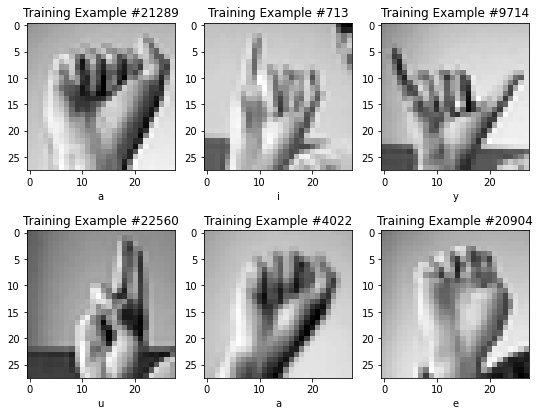

In [223]:
import random
# Shows 6 random training examples with labels
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    randindex = random.randint(0,len(np_train_img))
    plt.imshow(np_train_img[randindex],cmap='gray')
    plt.title(f"Training Example #{randindex}")
    plt.xlabel(labels_train_alphabet[randindex])
    
plt.show()

In [217]:
# This loads in the dataset. Thankfully, TensorFlow already has methods to load this dataset

#define target values
y_train = labels_train
y_test = labels_test

# Normalize input values
x_train = np_train/255. #0-1
x_test = np_test/255.

# Generate 32x32 image set for use in LeNet
cnn_x_train = x_train.reshape(-1,28,28,1) # don't know what this 1 does
cnn_x_test = x_test.reshape(-1,28,28,1)

# Resize images for use in MLP
mlp_x_train = x_train.reshape((x_train.shape[0], 784))
mlp_x_test = x_test.reshape((x_test.shape[0], 784))

In [12]:
mlp_x_train.shape

(27455, 784)

In [13]:
# Implements the network using TensorFlow.Keras
def MLPNetwork(inputDim):
    # input layer (note that batches are already taken care of for you)
    x = keras.Input(shape=(inputDim,))
    
    # subsequent dense layers
    a1 = keras.layers.Dense(512, activation='relu')(x)
    a2 = keras.layers.Dense(512, activation='relu')(a1)
    
    # classification dense layer
    logits = keras.layers.Dense(25, activation='softmax')(a2)
    
    # Creates the model given the above structure
    model = keras.Model(inputs=x, outputs=logits)
    return model

MLPmod = MLPNetwork(784)
MLPmod.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Sets up optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
MLPmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The callback forces the network to train until it reaches 100% accuracy
hist = MLPmod.fit(mlp_x_train, y_train, epochs=10, shuffle=True)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 4s 136us/sample - loss: 1.5352 - acc: 0.5111
Epoch 2/10
27455/27455 [==============================] - 3s 124us/sample - loss: 0.5586 - acc: 0.8138
Epoch 3/10
27455/27455 [==============================] - 3s 127us/sample - loss: 0.2760 - acc: 0.9106
Epoch 4/10
27455/27455 [==============================] - 3s 122us/sample - loss: 0.1533 - acc: 0.9513
Epoch 5/10
27455/27455 [==============================] - 3s 125us/sample - loss: 0.0860 - acc: 0.9751
Epoch 6/10
27455/27455 [==============================] - 4s 129us/sample - loss: 0.0786 - acc: 0.9768
Epoch 7/10
27455/27455 [==============================] - 4s 129us/sample - loss: 0.0924 - acc: 0.9727
Epoch 8/10
27455/27455 [==============================] - 3s 122us/sample - loss: 0.0713 - acc: 0.9778
Epoch 9/10
27455/27455 [==============================] - 4s 128us/sample - loss: 0.0711 - acc: 0.9785
Epoch 10/10
27455/27455 [=========================

In [15]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = MLPmod.evaluate(mlp_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 72us/sample - loss: 0.7456 - acc: 0.8334
Test accuracy for this model is 0.8333798050880432


In [262]:
# Creates the model with LeNet architecture, first state of the art neural network
def LeNet():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    #dropout 1 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    # dropout 2
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  # more on this later
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) #access loss?
    
    return mod

# Declares the model and prepares it for training
LeNetMod = LeNet()
opt = keras.optimizers.Adam()
LeNetMod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
LeNetMod.summary()

Model: "model_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_78 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_150 (Avera (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_151 (Avera (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_76 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_153 (Dense)            (None, 120)               308

In [263]:
from tensorflow.keras.callbacks import History

#History allows us to access accuracy and loss values in the model
history = History() 

# Trains the network using mini-batch learning
cnnHist = LeNetMod.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 8s 371us/sample - loss: 1.9124 - acc: 0.4087 - val_loss: 1.0748 - val_acc: 0.6578
Epoch 2/20
20591/20591 [==============================] - 4s 213us/sample - loss: 0.7449 - acc: 0.7569 - val_loss: 0.4774 - val_acc: 0.8457
Epoch 3/20
20591/20591 [==============================] - 4s 213us/sample - loss: 0.3474 - acc: 0.8881 - val_loss: 0.1950 - val_acc: 0.9422
Epoch 4/20
20591/20591 [==============================] - 5s 223us/sample - loss: 0.1582 - acc: 0.9538 - val_loss: 0.1193 - val_acc: 0.9672
Epoch 5/20
20591/20591 [==============================] - 5s 221us/sample - loss: 0.0790 - acc: 0.9785 - val_loss: 0.0514 - val_acc: 0.9882
Epoch 6/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.0426 - acc: 0.9901 - val_loss: 0.0221 - val_acc: 0.9981
Epoch 7/20
20591/20591 [==============================] - 5s 223us/sample - loss: 0.0321 - acc: 0.9922 - val_lo

KeyboardInterrupt: 

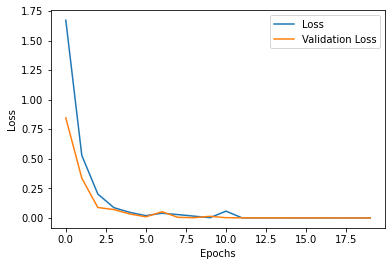

In [255]:
# cnnHist.history == dictionary with all saved loss and accuracy values
a = cnnHist.history['loss']
b = cnnHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [256]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = LeNetMod.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 173us/sample - loss: 0.5953 - acc: 0.8749
Test accuracy for this model is 0.8749302625656128


In [20]:
# create pandas dataframe to store all model testing/training loss/acc
model_data = {'test': [],
                'training loss': [],
              'training acc': [],
              'testing loss':[],
              'testing acc': []}
model_info = pd.DataFrame(model_data)



In [21]:
#initialize data for new data frame row
new_row = {'test': ['LeNet original'],
                'training loss': [cnnHist.history['loss'][-1]],
              'training acc': [cnnHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.0,0.854271,0.847741


There are 1032/7172 incorrectly labeled signs


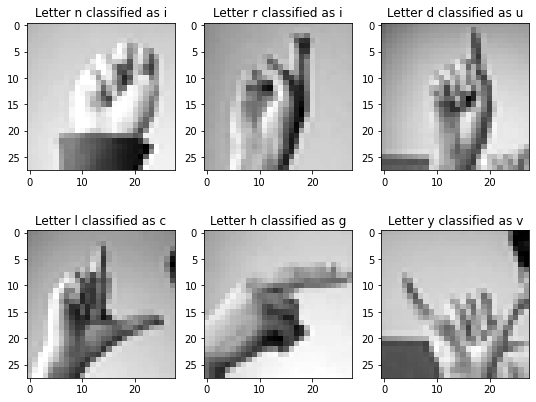

In [300]:
# Plot an incorrect value...
preds = LeNetMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1)
#convert preds to alphabetical labels
preds_alphabet = numToAlpha(preds)
incorrectPreds = np.argwhere(preds_alphabet != labels_test_alphabet)
print("There are {}/{} incorrectly labeled signs".format(incorrectPreds.shape[0],cnn_x_test.shape[0]))

plt.figure(figsize=(9,7))

for i in range(6):
    plt.subplot(2,3,i+1)
    randIncInd = np.random.choice(incorrectPreds.reshape(-1))
    plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[randIncInd], preds_alphabet[randIncInd]))
    
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

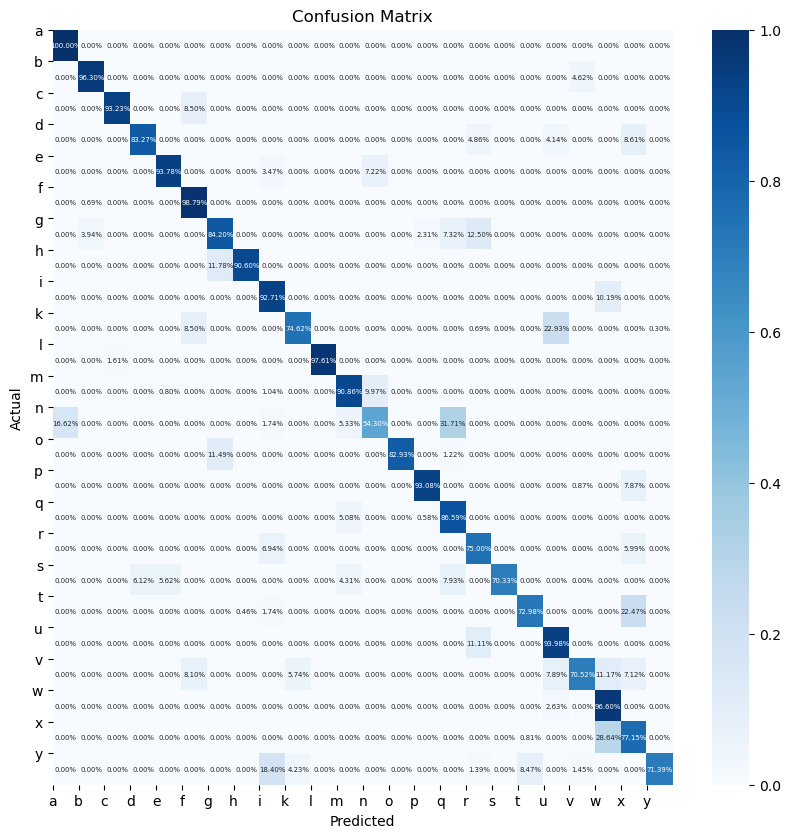

In [296]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
#define alphabet - missing j and z because those are moving signs
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(range(len(alphabet)), alphabet)
plt.yticks(range(len(alphabet)), alphabet, rotation='horizontal')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Improvements 4-24

- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- test different optimizer (SGD) and test different loss function (categorical cross entropy)
- .ImageDataGenerator??? rotates pictures?
- hyperparameters to consider: batch size, epochs, learning rate, kernel size, activation functions?

## 4/24/21 Improvements
- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- convert numbers to A-Z for readability

## Implement VGG16 Architecture
- LeNet may be overfitting as training acc is 100% and test acc is 86%

In [24]:
# vgg = tf.keras.applications.vgg16.VGG16(
#     include_top=True, weights= None, input_tensor=None,
#     input_shape=None, pooling=None, classes=1000,
#     classifier_activation='softmax')

In [25]:
#vggmod = keras.applications.vgg16.VGG16(include_top = False, input_shape = (28,28,3))

In [26]:
# opt = keras.optimizers.Adam()
# vggmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# vggmod.summary()

In [27]:
# cnn_vgg_hist = vggmod.fit(cnn_x_train, y_train, validation_split = 0.25, 
#                        batch_size=128, epochs=5, shuffle=True, callbacks = [history])

### Implementation considerations
- image augmentation via ImageDataGenerator
- early_stopping to stop model if it is not improving 


### Trying VGG 16
- overcomplicating the problem

In [28]:
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
# input
# https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155

vgginput = Input(shape =(28,28,1)) #changed from default shape of (224,224,3)
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(vgginput)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 1024, activation ='relu')(x) #changed num units
x = Dense(units = 1024, activation ='relu')(x) #changed num units
output = Dense(units = 25, activation ='softmax')(x) #changed num units
# creating the model

vggmodel = Model (inputs=vgginput, outputs =output)
opt = keras.optimizers.Adam()
vggmodel.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vggmodel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0   

In [29]:
vggHist = vggmodel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=5, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/5
20591/20591 [==============================] - 14s 699us/sample - loss: 3.1846 - acc: 0.0443 - val_loss: 3.1803 - val_acc: 0.0468
Epoch 2/5
20591/20591 [==============================] - 12s 596us/sample - loss: 3.1796 - acc: 0.0449 - val_loss: 3.1784 - val_acc: 0.0468
Epoch 3/5
20591/20591 [==============================] - 12s 592us/sample - loss: 3.1782 - acc: 0.0460 - val_loss: 3.1772 - val_acc: 0.0409
Epoch 4/5
20591/20591 [==============================] - 12s 591us/sample - loss: 3.1779 - acc: 0.0447 - val_loss: 3.1766 - val_acc: 0.0469
Epoch 5/5
20591/20591 [==============================] - 12s 590us/sample - loss: 3.1774 - acc: 0.0434 - val_loss: 3.1777 - val_acc: 0.0468


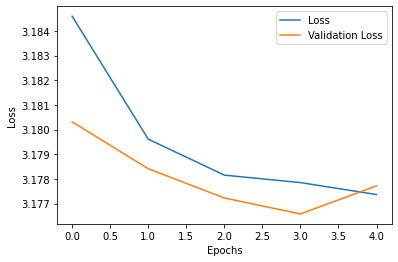

In [30]:
vggHist.history# training loss
a = vggHist.history['loss']
b = vggHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [31]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = vggmodel.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 2s 313us/sample - loss: 3.2049 - acc: 0.0201
Test accuracy for this model is 0.020078081637620926


In [32]:
#initialize data for new data frame row
new_row = {'test': ['vgg16 reshaped'],
                'training loss': [vggHist.history['loss'][-1]],
              'training acc': [vggHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index() 
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078


### Constants in testing
 - kernel size = 5x5
 - learning rate = .001
 - batch size = 50
 - epochs = 20
 - validation split = 25%
 - optimizer = opt = Adam() opt = keras.optimizers.Adam()
 - relu activation function
 - softmax activation function to classify at end of model
 - sparse_categorical_crossentropy loss model

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping( monitor = 'loss', min_delta=0.001, # minimium amount of decreasing loss to count as improvement
                                patience=10, # how many epochs to wait before stopping
                                restore_best_weights=True
                              )

## Testing Structure
- create a new CNN model
- compile model
- fit model to training data
- test model with testing data
- log accuracy, loss
- (maybe) input testing and training loss of each model in a bar graph?


### Test #1 
- add dropout layer after first pooling
- try 10% and 20% and continue on with that

In [34]:
# LeNet model with 10 % dropoout after first pooling
def testModel_1a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1a = testModel_1a()
testMod1a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1a.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0   

In [35]:
testMod1aHist = testMod1a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 173us/sample - loss: 1.2904 - acc: 0.5833 - val_loss: 0.4753 - val_acc: 0.8581
Epoch 2/20
20591/20591 [==============================] - 3s 163us/sample - loss: 0.3511 - acc: 0.8843 - val_loss: 0.1719 - val_acc: 0.9591
Epoch 3/20
20591/20591 [==============================] - 3s 164us/sample - loss: 0.1704 - acc: 0.9476 - val_loss: 0.0711 - val_acc: 0.9865
Epoch 4/20
20591/20591 [==============================] - 3s 162us/sample - loss: 0.0959 - acc: 0.9716 - val_loss: 0.0566 - val_acc: 0.9860
Epoch 5/20
20591/20591 [==============================] - 3s 160us/sample - loss: 0.0631 - acc: 0.9818 - val_loss: 0.0180 - val_acc: 0.9990
Epoch 6/20
20591/20591 [==============================] - 3s 159us/sample - loss: 0.0440 - acc: 0.9881 - val_loss: 0.0111 - val_acc: 0.9999
Epoch 7/20
20591/20591 [==============================] - 3s 161us/sample - loss: 0.0275 - acc: 0.9932 - val_lo

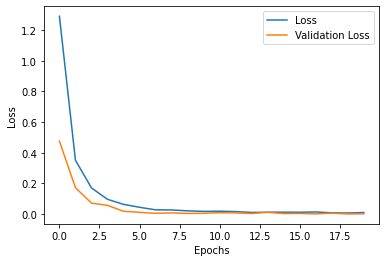

In [36]:
# testMod1aHist.history# training loss
a = testMod1aHist.history['loss']
b = testMod1aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [37]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 96us/sample - loss: 0.5542 - acc: 0.8939
Test accuracy for this model is 0.8938929438591003


In [38]:
#initialize data for new data frame row
new_row = {'test': ['1a: 10% DO'],
                'training loss': [testMod1aHist.history['loss'][-1]],
              'training acc': [testMod1aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893


In [39]:
# LeNet model with 20 % dropoout after first pooling
def testModel_1b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1b = testModel_1b()
testMod1b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1b.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0   

In [40]:
testMod1bHist = testMod1b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 176us/sample - loss: 1.5659 - acc: 0.4966 - val_loss: 0.6269 - val_acc: 0.7969
Epoch 2/20
20591/20591 [==============================] - 3s 165us/sample - loss: 0.5258 - acc: 0.8228 - val_loss: 0.2955 - val_acc: 0.9129
Epoch 3/20
20591/20591 [==============================] - 3s 160us/sample - loss: 0.3022 - acc: 0.8998 - val_loss: 0.1615 - val_acc: 0.9589
Epoch 4/20
20591/20591 [==============================] - 3s 163us/sample - loss: 0.1982 - acc: 0.9369 - val_loss: 0.0848 - val_acc: 0.9799
Epoch 5/20
20591/20591 [==============================] - 3s 162us/sample - loss: 0.1353 - acc: 0.9571 - val_loss: 0.0572 - val_acc: 0.9888
Epoch 6/20
20591/20591 [==============================] - 3s 162us/sample - loss: 0.1064 - acc: 0.9663 - val_loss: 0.0485 - val_acc: 0.9898
Epoch 7/20
20591/20591 [==============================] - 3s 161us/sample - loss: 0.0843 - acc: 0.9737 - val_lo

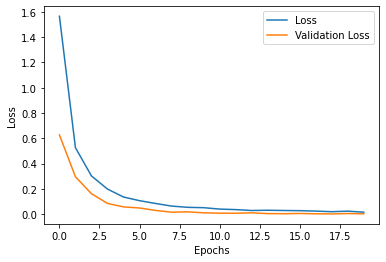

In [41]:
# testMod1bHist.history
a = testMod1bHist.history['loss']
b = testMod1bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [42]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 101us/sample - loss: 0.4081 - acc: 0.9147
Test accuracy for this model is 0.9146681427955627


In [43]:
#initialize data for new data frame row
new_row = {'test': ['1b: 20% DO'],
                'training loss': [testMod1bHist.history['loss'][-1]],
              'training acc': [testMod1bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668


### Test #2
- add dropout layer after second pooling
- try 10% and 20% and continue on with that

In [44]:
# LeNet model with 10 % dropoout after second pooling
def testModel_2a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2a = testModel_2a()
testMod2a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2a.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0   

In [45]:
testMod2aHist = testMod2a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 182us/sample - loss: 1.4409 - acc: 0.5340 - val_loss: 0.5917 - val_acc: 0.8164
Epoch 2/20
20591/20591 [==============================] - 3s 168us/sample - loss: 0.4697 - acc: 0.8431 - val_loss: 0.2294 - val_acc: 0.9277
Epoch 3/20
20591/20591 [==============================] - 3s 168us/sample - loss: 0.2470 - acc: 0.9166 - val_loss: 0.1306 - val_acc: 0.9640
Epoch 4/20
20591/20591 [==============================] - 3s 164us/sample - loss: 0.1561 - acc: 0.9480 - val_loss: 0.0520 - val_acc: 0.9899
Epoch 5/20
20591/20591 [==============================] - 3s 167us/sample - loss: 0.1016 - acc: 0.9681 - val_loss: 0.0356 - val_acc: 0.9952
Epoch 6/20
20591/20591 [==============================] - 3s 169us/sample - loss: 0.0764 - acc: 0.9761 - val_loss: 0.0289 - val_acc: 0.9977
Epoch 7/20
20591/20591 [==============================] - 3s 163us/sample - loss: 0.0571 - acc: 0.9817 - val_lo

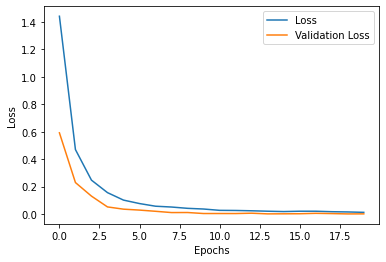

In [46]:
a = testMod2aHist.history['loss']
b = testMod2aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [47]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 102us/sample - loss: 0.6811 - acc: 0.8610
Test accuracy for this model is 0.8609871864318848


In [48]:
#initialize data for new data frame row
new_row = {'test': ['2a: 10% DO'],
                'training loss': [testMod2aHist.history['loss'][-1]],
              'training acc': [testMod2aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987


In [49]:
# LeNet model with 20 % dropoout after second pooling
def testModel_2b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2b = testModel_2b()
testMod2b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2b.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0   

In [50]:
testMod2bHist = testMod2b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 184us/sample - loss: 1.8309 - acc: 0.4117 - val_loss: 0.9014 - val_acc: 0.7063
Epoch 2/20
20591/20591 [==============================] - 3s 164us/sample - loss: 0.8816 - acc: 0.7039 - val_loss: 0.4640 - val_acc: 0.8459
Epoch 3/20
20591/20591 [==============================] - 3s 169us/sample - loss: 0.6002 - acc: 0.7919 - val_loss: 0.3114 - val_acc: 0.9009
Epoch 4/20
20591/20591 [==============================] - 3s 165us/sample - loss: 0.4551 - acc: 0.8383 - val_loss: 0.1861 - val_acc: 0.9483
Epoch 5/20
20591/20591 [==============================] - 3s 168us/sample - loss: 0.3711 - acc: 0.8739 - val_loss: 0.1658 - val_acc: 0.9612
Epoch 6/20
20591/20591 [==============================] - 3s 165us/sample - loss: 0.3138 - acc: 0.8921 - val_loss: 0.1113 - val_acc: 0.9787
Epoch 7/20
20591/20591 [==============================] - 3s 164us/sample - loss: 0.2708 - acc: 0.9097 - val_lo

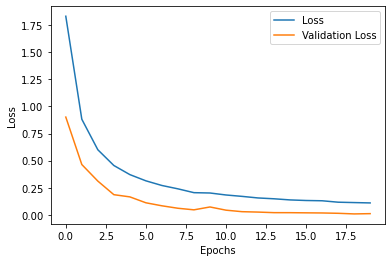

In [51]:
a = testMod2bHist.history['loss']
b = testMod2bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [52]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 102us/sample - loss: 0.3325 - acc: 0.9007
Test accuracy for this model is 0.9007250666618347


In [53]:
#initialize data for new data frame row
new_row = {'test': ['2b: 20% DO'],
                'training loss': [testMod2bHist.history['loss'][-1]],
              'training acc': [testMod2bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725


### Test #3
- add both dropout layers together

In [54]:
# LeNet model with 10 % dropoout after second pooling
def testModel_3():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod3 = testModel_3()
testMod3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 16)          0   

In [55]:
testMod3Hist = testMod3.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 201us/sample - loss: 1.7965 - acc: 0.4323 - val_loss: 0.7781 - val_acc: 0.7577
Epoch 2/20
20591/20591 [==============================] - 4s 175us/sample - loss: 0.6975 - acc: 0.7624 - val_loss: 0.2906 - val_acc: 0.9184
Epoch 3/20
20591/20591 [==============================] - 4s 178us/sample - loss: 0.4004 - acc: 0.8622 - val_loss: 0.1510 - val_acc: 0.9617
Epoch 4/20
20591/20591 [==============================] - 4s 176us/sample - loss: 0.2663 - acc: 0.9083 - val_loss: 0.0756 - val_acc: 0.9889
Epoch 5/20
20591/20591 [==============================] - 4s 175us/sample - loss: 0.1956 - acc: 0.9336 - val_loss: 0.0515 - val_acc: 0.9933
Epoch 6/20
20591/20591 [==============================] - 4s 174us/sample - loss: 0.1530 - acc: 0.9495 - val_loss: 0.0313 - val_acc: 0.9975
Epoch 7/20
20591/20591 [==============================] - 4s 173us/sample - loss: 0.1230 - acc: 0.9589 - val_lo

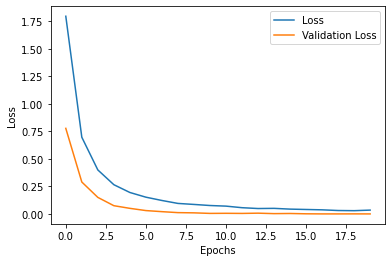

In [56]:
a = testMod3Hist.history['loss']
b = testMod3Hist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [57]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod3.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 107us/sample - loss: 0.3529 - acc: 0.9057
Test accuracy for this model is 0.9057445526123047


In [58]:
#initialize data for new data frame row
new_row = {'test': ['3: 2 DO layers'],
                'training loss': [testMod3Hist.history['loss'][-1]],
              'training acc': [testMod3Hist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745


### Best performance so far is with 2b - 20% dropout after second convolution and pooling
### now test removing dense layers

### Test #4
- remove dense layer 1 and 2 
- combine best w/ 2b

In [59]:
# LeNet model with one less dense layer
def testModel_4a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
#   out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4a = testModel_4a()
testMod4a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4a.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 84)                2158

In [60]:
testMod4aHist = testMod4a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 170us/sample - loss: 1.6959 - acc: 0.4791 - val_loss: 1.0139 - val_acc: 0.6731
Epoch 2/20
20591/20591 [==============================] - 3s 154us/sample - loss: 0.7165 - acc: 0.7745 - val_loss: 0.5388 - val_acc: 0.8252
Epoch 3/20
20591/20591 [==============================] - 3s 153us/sample - loss: 0.4123 - acc: 0.8685 - val_loss: 0.2929 - val_acc: 0.9161
Epoch 4/20
20591/20591 [==============================] - 3s 156us/sample - loss: 0.2446 - acc: 0.9235 - val_loss: 0.2058 - val_acc: 0.9324
Epoch 5/20
20591/20591 [==============================] - 3s 153us/sample - loss: 0.1454 - acc: 0.9584 - val_loss: 0.0989 - val_acc: 0.9799
Epoch 6/20
20591/20591 [==============================] - 3s 153us/sample - loss: 0.0842 - acc: 0.9811 - val_loss: 0.0698 - val_acc: 0.9824
Epoch 7/20
20591/20591 [==============================] - 3s 150us/sample - loss: 0.0505 - acc: 0.9911 - val_lo

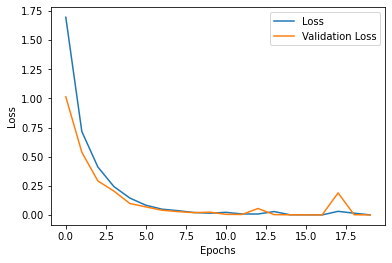

In [61]:
a = testMod4aHist.history['loss']
b = testMod4aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [62]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 97us/sample - loss: 1.0737 - acc: 0.8288
Test accuracy for this model is 0.8287785649299622


In [63]:
#initialize data for new data frame row
new_row = {'test': ['4a: remove 120 dense'],
                'training loss': [testMod4aHist.history['loss'][-1]],
              'training acc': [testMod4aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779


In [64]:
# LeNet model with one less dense layer
def testModel_4b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4b = testModel_4b()
testMod4b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4b.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 120)               3084

In [65]:
testMod4bHist = testMod4b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 179us/sample - loss: 1.1901 - acc: 0.6267 - val_loss: 0.5244 - val_acc: 0.8365
Epoch 2/20
20591/20591 [==============================] - 3s 156us/sample - loss: 0.3631 - acc: 0.8888 - val_loss: 0.2265 - val_acc: 0.9379
Epoch 3/20
20591/20591 [==============================] - 3s 152us/sample - loss: 0.1628 - acc: 0.9555 - val_loss: 0.0921 - val_acc: 0.9792
Epoch 4/20
20591/20591 [==============================] - 3s 156us/sample - loss: 0.0809 - acc: 0.9825 - val_loss: 0.0574 - val_acc: 0.9898
Epoch 5/20
20591/20591 [==============================] - 3s 150us/sample - loss: 0.0414 - acc: 0.9933 - val_loss: 0.0267 - val_acc: 0.9980
Epoch 6/20
20591/20591 [==============================] - 3s 158us/sample - loss: 0.0260 - acc: 0.9961 - val_loss: 0.0198 - val_acc: 0.9975
Epoch 7/20
20591/20591 [==============================] - 3s 153us/sample - loss: 0.0119 - acc: 0.9991 - val_lo

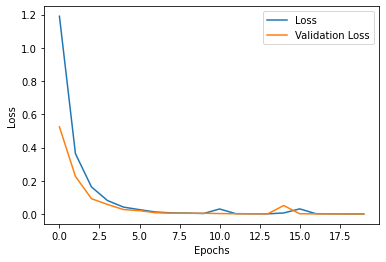

In [66]:
a = testMod4bHist.history['loss']
b = testMod4bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [67]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 104us/sample - loss: 0.7350 - acc: 0.8670
Test accuracy for this model is 0.8669826984405518


In [68]:
#initialize data for new data frame row
new_row = {'test': ['4b: remove 84 dense'],
                'training loss': [testMod4bHist.history['loss'][-1]],
              'training acc': [testMod4bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983


In [69]:
# LeNet model with one less dense layer and 20% dropout after second pooling
def testModel_4c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4c = testModel_4c()
testMod4c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4c.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_17 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0  

In [70]:
testMod4cHist = testMod4c.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 186us/sample - loss: 1.5720 - acc: 0.5056 - val_loss: 0.6911 - val_acc: 0.7959
Epoch 2/20
20591/20591 [==============================] - 3s 162us/sample - loss: 0.7184 - acc: 0.7580 - val_loss: 0.3589 - val_acc: 0.9022
Epoch 3/20
20591/20591 [==============================] - 3s 163us/sample - loss: 0.4855 - acc: 0.8355 - val_loss: 0.2474 - val_acc: 0.9285
Epoch 4/20
20591/20591 [==============================] - 3s 162us/sample - loss: 0.3636 - acc: 0.8771 - val_loss: 0.1448 - val_acc: 0.9617
Epoch 5/20
20591/20591 [==============================] - 3s 165us/sample - loss: 0.2876 - acc: 0.9034 - val_loss: 0.0942 - val_acc: 0.9821
Epoch 6/20
20591/20591 [==============================] - 3s 166us/sample - loss: 0.2524 - acc: 0.9151 - val_loss: 0.0948 - val_acc: 0.9767
Epoch 7/20
20591/20591 [==============================] - 3s 166us/sample - loss: 0.2136 - acc: 0.9292 - val_lo

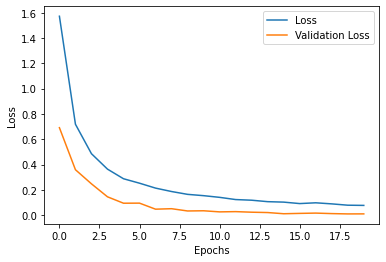

In [71]:
a = testMod4cHist.history['loss']
b = testMod4cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [72]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 108us/sample - loss: 0.4329 - acc: 0.9006
Test accuracy for this model is 0.9005855917930603


In [73]:
#initialize data for new data frame row
new_row = {'test': ['4c: remove 84 dense, add 20% DO'],
                'training loss': [testMod4cHist.history['loss'][-1]],
              'training acc': [testMod4cHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


## combination of dropped dense layer and dropout not as good as dropout alone

### Test #5
- add extra convolution layer before pooling
- combine it with dropout
- combine with dropout and dense layer missing

In [74]:
# LeNet model with additional convolution layer
def testModel_5a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5a = testModel_5a()
testMod5a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5a.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_19 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0  

In [75]:
testMod5aHist = testMod5a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 208us/sample - loss: 1.6746 - acc: 0.4493 - val_loss: 0.7917 - val_acc: 0.7338
Epoch 2/20
20591/20591 [==============================] - 4s 174us/sample - loss: 0.4921 - acc: 0.8329 - val_loss: 0.2681 - val_acc: 0.9136
Epoch 3/20
20591/20591 [==============================] - 3s 169us/sample - loss: 0.1825 - acc: 0.9433 - val_loss: 0.1366 - val_acc: 0.9567
Epoch 4/20
20591/20591 [==============================] - 4s 175us/sample - loss: 0.0823 - acc: 0.9770 - val_loss: 0.0484 - val_acc: 0.9908
Epoch 5/20
20591/20591 [==============================] - 4s 176us/sample - loss: 0.0396 - acc: 0.9901 - val_loss: 0.0176 - val_acc: 0.9983
Epoch 6/20
20591/20591 [==============================] - 4s 173us/sample - loss: 0.0236 - acc: 0.9946 - val_loss: 0.0141 - val_acc: 0.9974
Epoch 7/20
20591/20591 [==============================] - 4s 176us/sample - loss: 0.0263 - acc: 0.9919 - val_lo

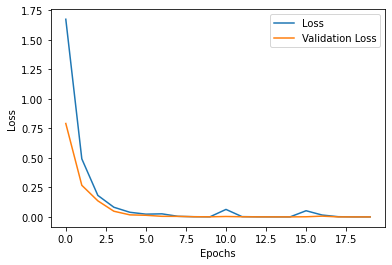

In [76]:
a = testMod5aHist.history['loss']
b = testMod5aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [77]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 123us/sample - loss: 0.9881 - acc: 0.8627
Test accuracy for this model is 0.8626603484153748


In [78]:
#initialize data for new data frame row
new_row = {'test': ['5a: Add Conv 32 out'],
                'training loss': [testMod5aHist.history['loss'][-1]],
              'training acc': [testMod5aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


In [79]:
#5b combine convolutional layer with 20 %dropout
# LeNet model with additional convolution layer
def testModel_5b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5b = testModel_5b()
testMod5b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5b.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_20 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_21 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 2, 32)          0  

In [80]:
testMod5bHist = testMod5b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 214us/sample - loss: 1.9414 - acc: 0.3739 - val_loss: 0.9840 - val_acc: 0.6913
Epoch 2/20
20591/20591 [==============================] - 4s 184us/sample - loss: 0.9571 - acc: 0.6699 - val_loss: 0.4776 - val_acc: 0.8443
Epoch 3/20
20591/20591 [==============================] - 4s 184us/sample - loss: 0.6270 - acc: 0.7787 - val_loss: 0.3129 - val_acc: 0.9104
Epoch 4/20
20591/20591 [==============================] - 4s 189us/sample - loss: 0.4485 - acc: 0.8460 - val_loss: 0.1619 - val_acc: 0.9612
Epoch 5/20
20591/20591 [==============================] - 4s 188us/sample - loss: 0.3475 - acc: 0.8800 - val_loss: 0.1060 - val_acc: 0.9792
Epoch 6/20
20591/20591 [==============================] - 4s 190us/sample - loss: 0.2807 - acc: 0.9033 - val_loss: 0.0654 - val_acc: 0.9911
Epoch 7/20
20591/20591 [==============================] - 4s 187us/sample - loss: 0.2342 - acc: 0.9205 - val_lo

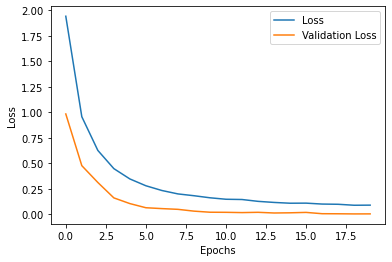

In [81]:
a = testMod5bHist.history['loss']
b = testMod5bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [82]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 118us/sample - loss: 0.3438 - acc: 0.8996
Test accuracy for this model is 0.8996095657348633


In [83]:
#initialize data for new data frame row
new_row = {'test': ['5b: Add Conv 32 out and 20% DO'],
                'training loss': [testMod5bHist.history['loss'][-1]],
              'training acc': [testMod5bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


### Test #6
- add image augmentation
- different levels of rotation/scaling?

In [84]:
# use keras preprocessing to apply random image manipulations and increase model especially as it relates to location
# and rotation invariance
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
augmentedData = ImageDataGenerator(rotation_range= 10, # randomly rotate images in the range 5 degrees 
                                   zoom_range = 0.1, # Randomly zoom image 10% 
                                   width_shift_range=0.1, # randomly shift images horizontally 10%
                                   height_shift_range=0.1, # randomly shift images vertically 10% 
                                   shear_range = 0.1) #randomly distorts/shears image, value affects intensity
augmentedData.fit(cnn_x_train)
train_generator = augmentedData.flow(cnn_x_train,y_train, batch_size = 50)



In [85]:
#Original LeNet model w/ data augmentation
def testModel_6a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6a = testModel_6a()
testMod6a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6a.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_23 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 120)               308

In [86]:
#using test data as validation data because image data generator does not allow simple validation split
testMod6aHist = testMod6a.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=20, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 13s 24ms/step - loss: 2.0070 - acc: 0.3667 - val_loss: 0.9947 - val_acc: 0.6730
Epoch 2/20
550/550 [==============================] - 10s 19ms/step - loss: 1.0715 - acc: 0.6446 - val_loss: 0.7656 - val_acc: 0.7255
Epoch 3/20
550/550 [==============================] - 10s 18ms/step - loss: 0.8038 - acc: 0.7338 - val_loss: 0.5278 - val_acc: 0.8300
Epoch 4/20
550/550 [==============================] - 10s 19ms/step - loss: 0.6628 - acc: 0.7772 - val_loss: 0.4745 - val_acc: 0.8383
Epoch 5/20
550/550 [==============================] - 10s 18ms/step - loss: 0.5663 - acc: 0.8113 - val_loss: 0.3708 - val_acc: 0.8620
Epoch 6/20
550/550 [==============================] - 10s 18ms/step - loss: 0.4978 - acc: 0.8354 - val_loss: 0.2887 - val_acc: 0.9105
Epoch 7/20
550/550 [==============================] - 10s 18ms/step - loss: 0.4257 - acc: 0.8573 - val_loss: 0.3051 - val_acc: 0.9046
Epoch 8/20
550/550 [==============================] - 10s 19ms

550/550 [==============================] - 11s 19ms/step - loss: 0.2341 - acc: 0.9215 - val_loss: 0.1294 - val_acc: 0.9633
Epoch 14/20
550/550 [==============================] - 10s 19ms/step - loss: 0.2204 - acc: 0.9255 - val_loss: 0.1483 - val_acc: 0.9518
Epoch 15/20
550/550 [==============================] - 11s 20ms/step - loss: 0.1981 - acc: 0.9329 - val_loss: 0.1223 - val_acc: 0.9661
Epoch 16/20
550/550 [==============================] - 11s 20ms/step - loss: 0.1827 - acc: 0.9413 - val_loss: 0.1401 - val_acc: 0.9533
Epoch 17/20
550/550 [==============================] - 11s 19ms/step - loss: 0.1748 - acc: 0.9410 - val_loss: 0.1041 - val_acc: 0.9723
Epoch 18/20
550/550 [==============================] - 11s 20ms/step - loss: 0.1633 - acc: 0.9458 - val_loss: 0.1211 - val_acc: 0.9590
Epoch 19/20
550/550 [==============================] - 11s 19ms/step - loss: 0.1584 - acc: 0.9481 - val_loss: 0.0841 - val_acc: 0.9770
Epoch 20/20
550/550 [==============================] - 11s 19ms/ste

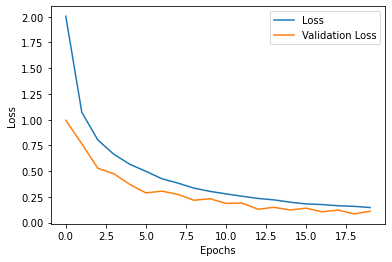

In [87]:
# testMod2aHist.history# training loss
a = testMod6aHist.history['loss']
b = testMod6aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [88]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 106us/sample - loss: 0.1100 - acc: 0.9710
Test accuracy for this model is 0.9709983468055725


In [89]:
#initialize data for new data frame row
new_row = {'test': ['6a: Add Image Aug'],
                'training loss': [testMod6aHist.history['loss'][-1]],
              'training acc': [testMod6aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


In [151]:
#Original LeNet model w/ data augmentation and dropout layer
def testModel_6b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6b = testModel_6b()
opt = keras.optimizers.Adam()
testMod6b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6b.summary()

Model: "model_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_108 (Avera (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_109 (Avera (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 256)               0  

In [152]:
testMod6bHist = testMod6b.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=20, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 19s 35ms/step - loss: 2.4324 - acc: 0.2486 - val_loss: 1.3758 - val_acc: 0.5842
Epoch 2/20
550/550 [==============================] - 13s 24ms/step - loss: 1.4925 - acc: 0.5162 - val_loss: 0.8868 - val_acc: 0.7133
Epoch 3/20
550/550 [==============================] - 13s 24ms/step - loss: 1.1303 - acc: 0.6279 - val_loss: 0.7399 - val_acc: 0.7559
Epoch 4/20
550/550 [==============================] - 13s 24ms/step - loss: 0.9294 - acc: 0.6889 - val_loss: 0.4811 - val_acc: 0.8441
Epoch 5/20
550/550 [==============================] - 13s 24ms/step - loss: 0.7856 - acc: 0.7390 - val_loss: 0.4138 - val_acc: 0.8735
Epoch 6/20
550/550 [==============================] - 13s 24ms/step - loss: 0.6988 - acc: 0.7663 - val_loss: 0.3815 - val_acc: 0.8701
Epoch 7/20
550/550 [==============================] - 13s 24ms/step - loss: 0.6148 - acc: 0.7941 - val_loss: 0.3449 - val_acc: 0.8712
Epoch 8/20
550/550 [==============================] - 13s 24ms

550/550 [==============================] - 14s 25ms/step - loss: 0.3790 - acc: 0.8734 - val_loss: 0.1481 - val_acc: 0.9584
Epoch 14/20
550/550 [==============================] - 14s 25ms/step - loss: 0.3514 - acc: 0.8787 - val_loss: 0.1417 - val_acc: 0.9628
Epoch 15/20
550/550 [==============================] - 14s 26ms/step - loss: 0.3347 - acc: 0.8877 - val_loss: 0.1248 - val_acc: 0.9657
Epoch 16/20
550/550 [==============================] - 13s 24ms/step - loss: 0.3167 - acc: 0.8918 - val_loss: 0.1266 - val_acc: 0.9608
Epoch 17/20
550/550 [==============================] - 13s 24ms/step - loss: 0.2949 - acc: 0.8980 - val_loss: 0.0844 - val_acc: 0.9813
Epoch 18/20
550/550 [==============================] - 13s 24ms/step - loss: 0.2790 - acc: 0.9032 - val_loss: 0.1163 - val_acc: 0.9650
Epoch 19/20
550/550 [==============================] - 13s 24ms/step - loss: 0.2611 - acc: 0.9111 - val_loss: 0.1053 - val_acc: 0.9702
Epoch 20/20
550/550 [==============================] - 14s 25ms/ste

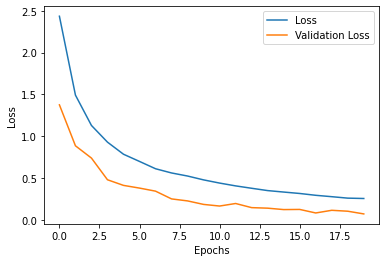

In [153]:
# testMod2aHist.history# training loss
a = testMod6bHist.history['loss']
b = testMod6bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [154]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 159us/sample - loss: 0.0731 - acc: 0.9838
Test accuracy for this model is 0.9838259816169739


In [155]:
#initialize data for new data frame row
new_row = {'test': ['6b: Add Image Aug and 20% DO'],
                'training loss': [testMod6bHist.history['loss'][-1]],
              'training acc': [testMod6bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


### image augmentation alone performed better than with the dropout layer ~1%

- loss in image augmentation is very high compared to dropout

### Test #7
- test hyper parameters
- learning rate, dropout rate, batch size, epochs, validation split, kernel size,
- test SGD vs Adam

In [95]:
#7a
# LeNet model with 10x learning
def testModel_7a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7a = testModel_7a()
opt = keras.optimizers.Adam(learning_rate=0.01) #10x learning rate 0.001 -> 0.01
testMod7a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7a.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_26 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_27 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 128)               0  

In [96]:
testMod7aHist = testMod7a.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 215us/sample - loss: 1.7072 - acc: 0.4483 - val_loss: 0.7197 - val_acc: 0.7481
Epoch 2/20
20591/20591 [==============================] - 4s 180us/sample - loss: 0.3439 - acc: 0.8825 - val_loss: 0.1581 - val_acc: 0.9427
Epoch 3/20
20591/20591 [==============================] - 4s 179us/sample - loss: 0.1809 - acc: 0.9412 - val_loss: 0.0610 - val_acc: 0.9811
Epoch 4/20
20591/20591 [==============================] - 4s 181us/sample - loss: 0.1303 - acc: 0.9617 - val_loss: 0.1253 - val_acc: 0.9633
Epoch 5/20
20591/20591 [==============================] - 4s 180us/sample - loss: 0.1282 - acc: 0.9625 - val_loss: 0.0353 - val_acc: 0.9901
Epoch 6/20
20591/20591 [==============================] - 4s 180us/sample - loss: 0.0130 - acc: 0.9964 - val_loss: 4.2246e-04 - val_acc: 1.0000
Epoch 7/20
20591/20591 [==============================] - 4s 178us/sample - loss: 0.1278 - acc: 0.9661 - va

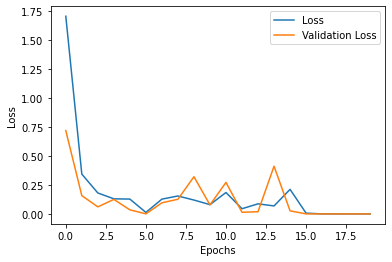

In [97]:
a = testMod7aHist.history['loss']
b = testMod7aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [98]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 120us/sample - loss: 1.9630 - acc: 0.8150
Test accuracy for this model is 0.8149749040603638


In [99]:
#initialize data for new data frame row
new_row = {'test': ['7a: 10x LR'],
                'training loss': [testMod7aHist.history['loss'][-1]],
              'training acc': [testMod7aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


In [100]:
#7b
# LeNet model with 3x3 kernel instead of 5x5
def testModel_7b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7b = testModel_7b()
opt = keras.optimizers.Adam() #10x learning rate 0.001 -> 0.01
testMod7b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7b.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_28 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d_29 (Averag (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0  

In [101]:
testMod7bHist = testMod7b.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 243us/sample - loss: 1.7555 - acc: 0.4591 - val_loss: 0.8438 - val_acc: 0.7335
Epoch 2/20
20591/20591 [==============================] - 4s 180us/sample - loss: 0.4857 - acc: 0.8430 - val_loss: 0.2180 - val_acc: 0.9340
Epoch 3/20
20591/20591 [==============================] - 4s 184us/sample - loss: 0.1603 - acc: 0.9498 - val_loss: 0.0544 - val_acc: 0.9885
Epoch 4/20
20591/20591 [==============================] - 4s 183us/sample - loss: 0.0548 - acc: 0.9849 - val_loss: 0.0394 - val_acc: 0.9878
Epoch 5/20
20591/20591 [==============================] - 4s 182us/sample - loss: 0.0189 - acc: 0.9962 - val_loss: 0.0065 - val_acc: 0.9996
Epoch 6/20
20591/20591 [==============================] - 4s 183us/sample - loss: 0.0262 - acc: 0.9921 - val_loss: 0.2177 - val_acc: 0.9274
Epoch 7/20
20591/20591 [==============================] - 4s 180us/sample - loss: 0.0275 - acc: 0.9926 - val_lo

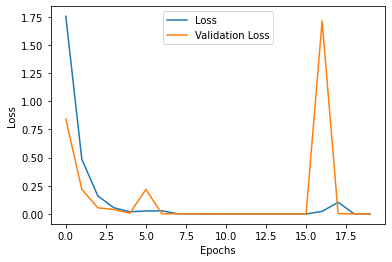

In [102]:
a = testMod7bHist.history['loss']
b = testMod7bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [103]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 157us/sample - loss: 0.6044 - acc: 0.8865
Test accuracy for this model is 0.8865030407905579


In [104]:
#initialize data for new data frame row
new_row = {'test': ['7b: 3x3 kernel'],
                'training loss': [testMod7bHist.history['loss'][-1]],
              'training acc': [testMod7bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


In [105]:
#7a
# LeNet model with 3x3 kernel instead of 5x5 and additional dropout layer
def testModel_7c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7c = testModel_7c()
opt = keras.optimizers.Adam() #10x learning rate 0.001 -> 0.01
testMod7c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7c.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_30 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d_31 (Averag (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 32)          0  

In [106]:
testMod7cHist = testMod7c.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size=50, epochs=20, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 227us/sample - loss: 1.7473 - acc: 0.4565 - val_loss: 0.6876 - val_acc: 0.8010
Epoch 2/20
20591/20591 [==============================] - 4s 189us/sample - loss: 0.5155 - acc: 0.8295 - val_loss: 0.2265 - val_acc: 0.9267
Epoch 3/20
20591/20591 [==============================] - 4s 190us/sample - loss: 0.2153 - acc: 0.9294 - val_loss: 0.0928 - val_acc: 0.9729
Epoch 4/20
20591/20591 [==============================] - 4s 190us/sample - loss: 0.1140 - acc: 0.9640 - val_loss: 0.0259 - val_acc: 0.9964
Epoch 5/20
20591/20591 [==============================] - 4s 191us/sample - loss: 0.0684 - acc: 0.9783 - val_loss: 0.0262 - val_acc: 0.9933
Epoch 6/20
20591/20591 [==============================] - 4s 193us/sample - loss: 0.0589 - acc: 0.9821 - val_loss: 0.0115 - val_acc: 0.9971
Epoch 7/20
20591/20591 [==============================] - 4s 203us/sample - loss: 0.0430 - acc: 0.9859 - val_lo

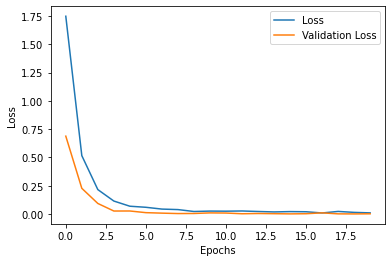

In [107]:
a = testMod7cHist.history['loss']
b = testMod7cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [108]:
# Evaluate the trained network on the testing dataset
# slightly better than 5x5 with dropout - change to use 3x3
testLoss, testAcc = testMod7c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 122us/sample - loss: 0.4330 - acc: 0.8939
Test accuracy for this model is 0.8938929438591003


In [109]:
#initialize data for new data frame row
new_row = {'test': ['7b: 3x3 kernel and 20% DO'],
                'training loss': [testMod7cHist.history['loss'][-1]],
              'training acc': [testMod7cHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


# automating hyperparameter testing

- test batch sizes from 50- batch_size_lst = linspace(50,250,15)
- test learning rate range from 0.001 to 0.01
- test dropout rate linspace(10,30,5)

4/25
- test validation split from 15-30 %
- test epochs 20-60

save value of hyperparameter that gives highest acc (use argmax)


In [127]:
#set up hyperparameter lists to loop through
batch_size_range = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
dropout_rate_range = [0.1, 0.2, 0.3] #10-30% last
learning_rate_range = [0.0010, 0.003, 0.005, 0.007, 0.01]
validation_split_range = [0.15,0.20,0.25,0.30, 0.35]
epoch_range = [20,30,40,50,60]
loss = 'sparse_categorical_crossentropy'

In [111]:
# test 8
# LeNet model with adjustable drop out rate for loop
def testModel_HyperParamLoop(dropout_rate = 0.2):
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = dropout_rate)(out) # updates every loop
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

In [112]:
#optimize batch size
batch_accuracies = {}

for batch_size in batch_size_range: 
    tempModel = testModel_HyperParamLoop() #create temporary model with default dropout 0.2
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= batch_size, epochs=20, shuffle=True, callbacks = [early_stopping, history]) 
                            # testing range of batch sizes
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    batch_accuracies[batch_size] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 9s 435us/sample - loss: 1.2954 - acc: 0.5754 - val_loss: 0.3866 - val_acc: 0.8792
Epoch 2/20
20591/20591 [==============================] - 7s 356us/sample - loss: 0.3138 - acc: 0.8915 - val_loss: 0.1285 - val_acc: 0.9615
Epoch 3/20
20591/20591 [==============================] - 7s 361us/sample - loss: 0.1442 - acc: 0.9513 - val_loss: 0.0503 - val_acc: 0.9863
Epoch 4/20
20591/20591 [==============================] - 7s 363us/sample - loss: 0.0845 - acc: 0.9724 - val_loss: 0.0133 - val_acc: 0.9985
Epoch 5/20
20591/20591 [==============================] - 7s 364us/sample - loss: 0.0572 - acc: 0.9808 - val_loss: 0.0090 - val_acc: 0.9988
Epoch 6/20
20591/20591 [==============================] - 8s 365us/sample - loss: 0.0492 - acc: 0.9839 - val_loss: 0.0062 - val_acc: 0.9999
Epoch 7/20
20591/20591 [==============================] - 7s 354us/sample - loss: 0.0384 - acc: 0.9866 - val_lo

20591/20591 [==============================] - 3s 137us/sample - loss: 0.0297 - acc: 0.9904 - val_loss: 0.0017 - val_acc: 0.9999
Epoch 17/20
20591/20591 [==============================] - 3s 143us/sample - loss: 0.0196 - acc: 0.9940 - val_loss: 0.0019 - val_acc: 0.9997
Epoch 18/20
20591/20591 [==============================] - 3s 144us/sample - loss: 0.0190 - acc: 0.9937 - val_loss: 0.0021 - val_acc: 0.9999
Epoch 19/20
20591/20591 [==============================] - 3s 139us/sample - loss: 0.0193 - acc: 0.9936 - val_loss: 9.8414e-04 - val_acc: 1.0000
Epoch 20/20
7172/7172 [==============================] - 1s 131us/sample - loss: 0.3359 - acc: 0.9374
Test accuracy for this model is 0.937395453453064
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 208us/sample - loss: 1.4713 - acc: 0.5276 - val_loss: 0.5182 - val_acc: 0.8476
Epoch 2/20
20591/20591 [==============================] - 2s 114us/sample - loss: 0.3890 - acc: 0.8643 

20591/20591 [==============================] - 2s 79us/sample - loss: 0.0292 - acc: 0.9909 - val_loss: 0.0040 - val_acc: 0.9997
Epoch 11/20
20591/20591 [==============================] - 2s 82us/sample - loss: 0.0214 - acc: 0.9937 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 12/20
20591/20591 [==============================] - 2s 81us/sample - loss: 0.0254 - acc: 0.9918 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 13/20
20591/20591 [==============================] - 2s 87us/sample - loss: 0.0257 - acc: 0.9920 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 14/20
20591/20591 [==============================] - 2s 85us/sample - loss: 0.0190 - acc: 0.9942 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 15/20
20591/20591 [==============================] - 2s 75us/sample - loss: 0.0160 - acc: 0.9953 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 16/20
20591/20591 [==============================] - 2s 81us/sample - loss: 0.0210 - acc: 0.9939 - val_loss: 8.4463e-04 - val_acc: 1.0000
Epoch 17/20
20591/20591 [===

20591/20591 [==============================] - 1s 61us/sample - loss: 0.2118 - acc: 0.9300 - val_loss: 0.1022 - val_acc: 0.9757
Epoch 5/20
20591/20591 [==============================] - 1s 64us/sample - loss: 0.1586 - acc: 0.9475 - val_loss: 0.0612 - val_acc: 0.9898
Epoch 6/20
20591/20591 [==============================] - 1s 64us/sample - loss: 0.1175 - acc: 0.9629 - val_loss: 0.0433 - val_acc: 0.9930
Epoch 7/20
20591/20591 [==============================] - 1s 63us/sample - loss: 0.0881 - acc: 0.9729 - val_loss: 0.0317 - val_acc: 0.9936
Epoch 8/20
20591/20591 [==============================] - 1s 63us/sample - loss: 0.0730 - acc: 0.9771 - val_loss: 0.0215 - val_acc: 0.9968
Epoch 9/20
20591/20591 [==============================] - 1s 63us/sample - loss: 0.0624 - acc: 0.9813 - val_loss: 0.0145 - val_acc: 0.9987
Epoch 10/20
20591/20591 [==============================] - 1s 64us/sample - loss: 0.0520 - acc: 0.9851 - val_loss: 0.0150 - val_acc: 0.9968
Epoch 11/20
20591/20591 [============

7172/7172 [==============================] - 1s 152us/sample - loss: 0.4198 - acc: 0.9202
Test accuracy for this model is 0.9202454090118408
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 134us/sample - loss: 1.9210 - acc: 0.3934 - val_loss: 0.8794 - val_acc: 0.7264
Epoch 2/20
20591/20591 [==============================] - 1s 52us/sample - loss: 0.6350 - acc: 0.7868 - val_loss: 0.3205 - val_acc: 0.9130
Epoch 3/20
20591/20591 [==============================] - 1s 56us/sample - loss: 0.3057 - acc: 0.8966 - val_loss: 0.1421 - val_acc: 0.9610
Epoch 4/20
20591/20591 [==============================] - 1s 57us/sample - loss: 0.1707 - acc: 0.9443 - val_loss: 0.0666 - val_acc: 0.9878
Epoch 5/20
20591/20591 [==============================] - 1s 51us/sample - loss: 0.1134 - acc: 0.9638 - val_loss: 0.0356 - val_acc: 0.9933
Epoch 6/20
20591/20591 [==============================] - 1s 49us/sample - loss: 0.0764 - acc: 0.9759 - val_loss: 

In [113]:
def GetKey(acc_dict,val):
    for key, value in acc_dict.items():
        if val == value[1]:
            return key

In [114]:
# get optimal batch size via max test accuracy
# print(batch_accuracies)
max_test_acc = max(batch_accuracies.values())[1]
optimal_batch_size = GetKey(batch_accuracies, max_test_acc)
print('Optimal batch size is {}'.format(optimal_batch_size) )

Optimal batch size is 275


In [115]:
# optimize learning rate
learning_rates = {}

for learning_rate in learning_rate_range: 
    tempModel = testModel_HyperParamLoop() #create temporary model with default 0.2 dropout
    opt = keras.optimizers.Adam(learning_rate= learning_rate) #update learning rate each loop
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= optimal_batch_size, epochs=20, shuffle=True, callbacks = [early_stopping, history]) 
                            # testing range of batch sizes
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    learning_rates[learning_rate] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 125us/sample - loss: 2.8273 - acc: 0.1434 - val_loss: 1.9931 - val_acc: 0.3636
Epoch 2/20
20591/20591 [==============================] - 1s 53us/sample - loss: 1.5785 - acc: 0.4977 - val_loss: 1.0733 - val_acc: 0.6531
Epoch 3/20
20591/20591 [==============================] - 1s 55us/sample - loss: 0.9276 - acc: 0.6949 - val_loss: 0.6098 - val_acc: 0.8019
Epoch 4/20
20591/20591 [==============================] - 1s 55us/sample - loss: 0.6015 - acc: 0.8011 - val_loss: 0.3857 - val_acc: 0.8784
Epoch 5/20
20591/20591 [==============================] - 1s 57us/sample - loss: 0.4340 - acc: 0.8542 - val_loss: 0.2590 - val_acc: 0.9247
Epoch 6/20
20591/20591 [==============================] - 1s 54us/sample - loss: 0.3087 - acc: 0.8985 - val_loss: 0.1886 - val_acc: 0.9510
Epoch 7/20
20591/20591 [==============================] - 1s 59us/sample - loss: 0.2402 - acc: 0.9186 - val_loss: 0.

20591/20591 [==============================] - 1s 54us/sample - loss: 0.0153 - acc: 0.9955 - val_loss: 0.0021 - val_acc: 0.9996
Epoch 17/20
20591/20591 [==============================] - 1s 55us/sample - loss: 0.0217 - acc: 0.9938 - val_loss: 0.0015 - val_acc: 0.9996
Epoch 18/20
20591/20591 [==============================] - 1s 52us/sample - loss: 0.0133 - acc: 0.9963 - val_loss: 0.0021 - val_acc: 0.9996
Epoch 19/20
20591/20591 [==============================] - 1s 60us/sample - loss: 0.0138 - acc: 0.9952 - val_loss: 0.0021 - val_acc: 0.9994
Epoch 20/20
7172/7172 [==============================] - 1s 158us/sample - loss: 0.5760 - acc: 0.8950
Test accuracy for this model is 0.895008385181427
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 143us/sample - loss: 2.1496 - acc: 0.3230 - val_loss: 1.1311 - val_acc: 0.6203
Epoch 2/20
20591/20591 [==============================] - 1s 57us/sample - loss: 0.8792 - acc: 0.6925 - val_los

In [116]:
# get optimal learning rate via max test accuracy
# print(learning_rates)
max_test_acc = max(learning_rates.values())[1]
optimal_learning_rate = GetKey(learning_rates, max_test_acc)
opt = keras.optimizers.Adam(learning_rate = optimal_learning_rate) # set SGD optimization with optimal lr
print('Optimal learning rate is {}'.format(optimal_learning_rate))

Optimal learning rate is 0.007


In [159]:
# optimize epochs
epochs_dict = {}

for epoch_len in epoch_range:
    tempModel = testModel_HyperParamLoop() #create temporary model
    opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                              batch_size= optimal_batch_size, epochs=epoch_len, shuffle=True, callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    epochs_dict[epoch_len] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 214us/sample - loss: 2.0574 - acc: 0.3522 - val_loss: 0.9412 - val_acc: 0.6818
Epoch 2/20
20591/20591 [==============================] - 1s 64us/sample - loss: 0.6436 - acc: 0.7762 - val_loss: 0.2857 - val_acc: 0.9126
Epoch 3/20
20591/20591 [==============================] - 1s 60us/sample - loss: 0.2726 - acc: 0.9037 - val_loss: 0.0976 - val_acc: 0.9733
Epoch 4/20
20591/20591 [==============================] - 1s 52us/sample - loss: 0.1696 - acc: 0.9415 - val_loss: 0.0554 - val_acc: 0.9856
Epoch 5/20
20591/20591 [==============================] - 1s 56us/sample - loss: 0.1033 - acc: 0.9651 - val_loss: 0.0147 - val_acc: 0.9975
Epoch 6/20
20591/20591 [==============================] - 1s 58us/sample - loss: 0.0649 - acc: 0.9792 - val_loss: 0.0124 - val_acc: 0.9983
Epoch 7/20
20591/20591 [==============================] - 1s 60us/sample - loss: 0.0733 - acc: 0.9767 - val_loss: 0.

20591/20591 [==============================] - 1s 60us/sample - loss: 0.0590 - acc: 0.9806 - val_loss: 0.0140 - val_acc: 0.9968
Epoch 7/40
20591/20591 [==============================] - 1s 60us/sample - loss: 0.0405 - acc: 0.9865 - val_loss: 0.0067 - val_acc: 0.9990
Epoch 8/40
20591/20591 [==============================] - 1s 59us/sample - loss: 0.0324 - acc: 0.9890 - val_loss: 0.0068 - val_acc: 0.9978
Epoch 9/40
20591/20591 [==============================] - 1s 66us/sample - loss: 0.0367 - acc: 0.9880 - val_loss: 0.0142 - val_acc: 0.9965
Epoch 10/40
20591/20591 [==============================] - 1s 62us/sample - loss: 0.0280 - acc: 0.9907 - val_loss: 0.0108 - val_acc: 0.9969
Epoch 11/40
20591/20591 [==============================] - 1s 56us/sample - loss: 0.0237 - acc: 0.9927 - val_loss: 0.0020 - val_acc: 0.9999
Epoch 12/40
20591/20591 [==============================] - 1s 61us/sample - loss: 0.0165 - acc: 0.9949 - val_loss: 0.0048 - val_acc: 0.9981
Epoch 13/40
20591/20591 [==========

Epoch 24/50
20591/20591 [==============================] - 1s 54us/sample - loss: 0.0161 - acc: 0.9949 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 25/50
20591/20591 [==============================] - 1s 56us/sample - loss: 0.0151 - acc: 0.9950 - val_loss: 1.4020e-04 - val_acc: 1.0000
Epoch 26/50
20591/20591 [==============================] - 1s 57us/sample - loss: 0.0138 - acc: 0.9958 - val_loss: 6.5516e-04 - val_acc: 1.0000
Epoch 27/50
20591/20591 [==============================] - 1s 63us/sample - loss: 0.0268 - acc: 0.9910 - val_loss: 0.0014 - val_acc: 0.9999
Epoch 28/50
20591/20591 [==============================] - 1s 63us/sample - loss: 0.0178 - acc: 0.9941 - val_loss: 0.0050 - val_acc: 0.9985
Epoch 29/50
20591/20591 [==============================] - 1s 58us/sample - loss: 0.0142 - acc: 0.9957 - val_loss: 0.0011 - val_acc: 0.9997
Epoch 30/50
20591/20591 [==============================] - 1s 56us/sample - loss: 0.0157 - acc: 0.9949 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 31/50


In [160]:
'''why is accuracy so low after first loop ~ <=5%
   solved by reinitializing Adam SGD optimizer'''
# get optimal epoch length via max test accuracy
max_test_acc = max(epochs_dict.values())[1]
optimal_epoch_len = GetKey(epochs_dict, max_test_acc)
print('Optimal epoch_len is {}'.format(optimal_epoch_len))

Optimal epoch_len is 60


In [161]:
# optimize validation split
val_split_rates = {}

for val_split in validation_split_range:
    tempModel = testModel_HyperParamLoop() #create temporary model
    opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = val_split, 
                              batch_size= optimal_batch_size, epochs=optimal_epoch_len, shuffle=True,
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    val_split_rates[val_split] = [trainAcc, testAcc] #save model accuracy in dictionary

Train on 23336 samples, validate on 4119 samples
Epoch 1/60
23336/23336 [==============================] - 5s 207us/sample - loss: 2.0520 - acc: 0.3537 - val_loss: 0.7931 - val_acc: 0.7424
Epoch 2/60
23336/23336 [==============================] - 1s 60us/sample - loss: 0.5596 - acc: 0.8064 - val_loss: 0.1897 - val_acc: 0.9437
Epoch 3/60
23336/23336 [==============================] - 1s 58us/sample - loss: 0.2383 - acc: 0.9152 - val_loss: 0.0768 - val_acc: 0.9791
Epoch 4/60
23336/23336 [==============================] - 1s 55us/sample - loss: 0.1086 - acc: 0.9622 - val_loss: 0.0355 - val_acc: 0.9908
Epoch 5/60
23336/23336 [==============================] - 1s 50us/sample - loss: 0.0746 - acc: 0.9744 - val_loss: 0.0199 - val_acc: 0.9934
Epoch 6/60
23336/23336 [==============================] - 1s 49us/sample - loss: 0.0568 - acc: 0.9806 - val_loss: 0.0144 - val_acc: 0.9971
Epoch 7/60
23336/23336 [==============================] - 1s 52us/sample - loss: 0.0538 - acc: 0.9820 - val_loss: 0.

20591/20591 [==============================] - 5s 246us/sample - loss: 2.3066 - acc: 0.2830 - val_loss: 1.2294 - val_acc: 0.5801
Epoch 2/60
20591/20591 [==============================] - 1s 66us/sample - loss: 0.7956 - acc: 0.7283 - val_loss: 0.3090 - val_acc: 0.8872
Epoch 3/60
20591/20591 [==============================] - 1s 65us/sample - loss: 0.2981 - acc: 0.8944 - val_loss: 0.1148 - val_acc: 0.9707
Epoch 4/60
20591/20591 [==============================] - 1s 59us/sample - loss: 0.1595 - acc: 0.9429 - val_loss: 0.0504 - val_acc: 0.9872
Epoch 5/60
20591/20591 [==============================] - 1s 61us/sample - loss: 0.1021 - acc: 0.9643 - val_loss: 0.0167 - val_acc: 0.9966
Epoch 6/60
20591/20591 [==============================] - 1s 63us/sample - loss: 0.0693 - acc: 0.9770 - val_loss: 0.0310 - val_acc: 0.9916
Epoch 7/60
20591/20591 [==============================] - 1s 66us/sample - loss: 0.0655 - acc: 0.9785 - val_loss: 0.0087 - val_acc: 0.9988
Epoch 8/60
20591/20591 [=============

Epoch 22/60
19218/19218 [==============================] - 1s 63us/sample - loss: 0.0269 - acc: 0.9912 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 23/60
19218/19218 [==============================] - 1s 63us/sample - loss: 0.0192 - acc: 0.9941 - val_loss: 0.0016 - val_acc: 0.9998
Epoch 24/60
19218/19218 [==============================] - 1s 61us/sample - loss: 0.0149 - acc: 0.9953 - val_loss: 0.0012 - val_acc: 0.9998
Epoch 25/60
19218/19218 [==============================] - 1s 66us/sample - loss: 0.0115 - acc: 0.9962 - val_loss: 5.2324e-04 - val_acc: 0.9999
Epoch 26/60
19218/19218 [==============================] - 1s 62us/sample - loss: 0.0184 - acc: 0.9945 - val_loss: 0.0044 - val_acc: 0.9993
Epoch 27/60
19218/19218 [==============================] - 1s 63us/sample - loss: 0.0267 - acc: 0.9918 - val_loss: 0.0020 - val_acc: 0.9998
Epoch 28/60
19218/19218 [==============================] - 1s 65us/sample - loss: 0.0122 - acc: 0.9964 - val_loss: 6.9661e-04 - val_acc: 1.0000
Epoch 29/60


In [162]:
'''happened again after first loop that there is really low % acc'''
# get optimal validation split % via max test accuracy
max_test_acc = max(val_split_rates.values())[1]
optimal_val_split = GetKey(val_split_rates, max_test_acc)
print('Optimal validation split percent is {}'.format(optimal_val_split))

Optimal validation split percent is 0.15


In [164]:
dropout_rates = {}


for dropout in dropout_rate_range:
    print(dropout)
    tempModel = testModel_HyperParamLoop(dropout) #create temporary model
    opt = keras.optimizers.Adam(learning_rate= optimal_learning_rate)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = optimal_val_split, 
                              batch_size= optimal_batch_size, epochs=optimal_epoch_len, shuffle=True, 
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    dropout_rates[dropout] = [trainAcc, testAcc] #save model accuracy in dictionary

0.1
Train on 23336 samples, validate on 4119 samples
Epoch 1/60
23336/23336 [==============================] - 5s 215us/sample - loss: 1.9919 - acc: 0.3753 - val_loss: 0.9098 - val_acc: 0.6975
Epoch 2/60
23336/23336 [==============================] - 1s 59us/sample - loss: 0.5102 - acc: 0.8233 - val_loss: 0.1589 - val_acc: 0.9488
Epoch 3/60
23336/23336 [==============================] - 1s 61us/sample - loss: 0.1721 - acc: 0.9412 - val_loss: 0.0486 - val_acc: 0.9879
Epoch 4/60
23336/23336 [==============================] - 1s 57us/sample - loss: 0.0892 - acc: 0.9703 - val_loss: 0.0490 - val_acc: 0.9832
Epoch 5/60
23336/23336 [==============================] - 1s 56us/sample - loss: 0.0683 - acc: 0.9763 - val_loss: 0.0210 - val_acc: 0.9956
Epoch 6/60
23336/23336 [==============================] - 1s 50us/sample - loss: 0.0774 - acc: 0.9744 - val_loss: 0.0216 - val_acc: 0.9942
Epoch 7/60
23336/23336 [==============================] - 1s 50us/sample - loss: 0.0322 - acc: 0.9900 - val_loss

23336/23336 [==============================] - 1s 54us/sample - loss: 0.0211 - acc: 0.9928 - val_loss: 0.0031 - val_acc: 0.9998
Epoch 26/60
23336/23336 [==============================] - 1s 56us/sample - loss: 0.0177 - acc: 0.9944 - val_loss: 0.0018 - val_acc: 0.9995
Epoch 27/60
23336/23336 [==============================] - 1s 55us/sample - loss: 0.0160 - acc: 0.9954 - val_loss: 0.0017 - val_acc: 0.9998
Epoch 28/60
23336/23336 [==============================] - 1s 60us/sample - loss: 0.0191 - acc: 0.9943 - val_loss: 0.0013 - val_acc: 0.9995
Epoch 29/60
23336/23336 [==============================] - 1s 56us/sample - loss: 0.0253 - acc: 0.9922 - val_loss: 4.4388e-04 - val_acc: 1.0000
Epoch 30/60
23336/23336 [==============================] - 1s 60us/sample - loss: 0.0254 - acc: 0.9922 - val_loss: 0.0075 - val_acc: 0.9981
Epoch 31/60
23336/23336 [==============================] - 1s 57us/sample - loss: 0.0281 - acc: 0.9919 - val_loss: 0.0078 - val_acc: 0.9976
Epoch 32/60
23336/23336 [===

23336/23336 [==============================] - 1s 60us/sample - loss: 0.0223 - acc: 0.9925 - val_loss: 5.9184e-04 - val_acc: 1.0000
Epoch 27/60
23336/23336 [==============================] - 1s 59us/sample - loss: 0.0180 - acc: 0.9938 - val_loss: 0.0016 - val_acc: 0.9990
Epoch 28/60
23336/23336 [==============================] - 1s 57us/sample - loss: 0.0202 - acc: 0.9934 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 29/60
23336/23336 [==============================] - 1s 60us/sample - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0027 - val_acc: 0.9993
Epoch 30/60
7172/7172 [==============================] - 1s 185us/sample - loss: 0.4198 - acc: 0.9221
Test accuracy for this model is 0.9220579862594604


In [166]:
'''low percent on subsequent runs again'''
# get optimal dropout rate via max test accuracy
'''no clue why the accuracy plummets to 4%'''
max_test_acc = max(dropout_rates.values())[1]
optimal_dropout_rate = GetKey(dropout_rates, max_test_acc)
print('Optimal dropout rate is {}'.format(optimal_dropout_rate))

Optimal dropout rate is 0.2


### Optimal hyperparameters 4/24
- batch size = 125
- dropout rate = 0.1
- learning rate = 0.005

In [149]:
### Optimal hyperparameters 4/25

In [167]:
print('optimal dropout rate is {}'.format(optimal_dropout_rate))
print('optimal validation split is {}%'.format(optimal_val_split*100))
print('optimal epoch length is {}'.format(optimal_epoch_len))
print('optimal learning rate is {}'.format(optimal_learning_rate))
print('optimal batch size is {}'.format(optimal_batch_size))

optimal dropout rate is 0.2
optimal validation split is 15.0%
optimal epoch length is 60
optimal learning rate is 0.007
optimal batch size is 275


### Test final model
- Augmented image dataset with 20% dropout after second pooling layer and optimized hyper parameters above

In [168]:
# LeNet model with optimized hyperparameters and architecture
def optimizedModel(dropout_rate = optimal_dropout_rate): # added optimal dropout rate
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.Conv2D(32, 3, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = dropout_rate)(out) # updates every loop
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
optimalMod = optimizedModel()
opt = keras.optimizers.Adam(learning_rate = optimal_learning_rate) #added optimal learning rate
optimalMod.compile(optimizer=opt, loss=loss, metrics=['accuracy']) 
optimalMod.summary()

Model: "model_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_138 (Avera (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 11, 11, 16)        880       
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 9, 9, 32)          4640      
_________________________________________________________________
average_pooling2d_139 (Avera (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 4, 4, 32)          0  

In [169]:
#augment data with optimal batch size
augmentedData = ImageDataGenerator(rotation_range= 10, # randomly rotate images in the range 5 degrees 
                                   zoom_range = 0.1, # Randomly zoom image 10% 
                                   width_shift_range=0.1, # randomly shift images horizontally 10%
                                   height_shift_range=0.1, # randomly shift images vertically 10% 
                                   shear_range = 0.1) #randomly distorts/shears image, value affects intensity
augmentedData.fit(cnn_x_train)
train_generator = augmentedData.flow(cnn_x_train,y_train, batch_size = optimal_batch_size)

#fit model with augmented data and additional layer
optimalModelHist = optimalMod.fit(train_generator, validation_data = (cnn_x_test,y_test), epochs=optimal_epoch_len, #include optimal epoch len
                                  shuffle=True, callbacks = [early_stopping, history])
                                



Epoch 1/60
 99/100 [============================>.] - ETA: 0s - loss: 2.4954 - acc: 0.2322Epoch 1/60
7172/100 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 85ms/step - loss: 0.7004 - acc: 0.7591 - val_loss: 0.3271 - val_acc: 0.8816
Epoch 5/60
 99/100 [============================>.] - ETA: 0s - loss: 0.5792 - acc: 0.8029Epoch 1/60
7172/100 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 81ms/step - loss: 0.3564 - acc: 0.8766 - val_loss: 0.1701 - val_acc: 0.9459
Epoch 9/60
 99/100 [============================>.] - ETA: 0s - loss: 0.3369 - acc: 0.8862Epoch 1/60
7172/100 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 83ms/step - loss: 0.2604 - acc: 0.9123 - val_loss: 0.1025 - val_acc: 0.9682
Epoch 13/60
 99/100 [============================>.] - ETA: 0s - loss: 0.2440 - acc: 0.9181- ETA: 0s - loss: 0.2445 - acc: 0.Epoch 1/60
7172/100 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 80ms/step - loss: 0.2031 - acc: 0.9300 - val_loss: 0.0897 - val_acc: 0.9721
Epoch 17/60
 99/100 [============================>.] - ETA: 0s - loss: 0.2042 - acc: 0.9318Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 82ms/step - loss: 0.1796 - acc: 0.9396 - val_loss: 0.0580 - val_acc: 0.9826
Epoch 21/60
 99/100 [============================>.] - ETA: 0s - loss: 0.1626 - acc: 0.9458Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 82ms/step - loss: 0.1576 - acc: 0.9471 - val_loss: 0.0216 - val_acc: 0.9934
Epoch 25/60
 99/100 [============================>.] - ETA: 0s - loss: 0.1450 - acc: 0.9512Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 80ms/step - loss: 0.1329 - acc: 0.9568 - val_loss: 0.0287 - val_acc: 0.9907
Epoch 29/60
 99/100 [============================>.] - ETA: 0s - loss: 0.1321 - acc: 0.9562Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 83ms/step - loss: 0.1257 - acc: 0.9582 - val_loss: 0.0332 - val_acc: 0.9879
Epoch 33/60
 99/100 [============================>.] - ETA: 0s - loss: 0.1144 - acc: 0.9633Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 83ms/step - loss: 0.1153 - acc: 0.9616 - val_loss: 0.0304 - val_acc: 0.9887
Epoch 37/60
 99/100 [============================>.] - ETA: 0s - loss: 0.1086 - acc: 0.9624Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 82ms/step - loss: 0.1023 - acc: 0.9655 - val_loss: 0.0264 - val_acc: 0.9909
Epoch 41/60
 99/100 [============================>.] - ETA: 0s - loss: 0.0961 - acc: 0.9687Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 83ms/step - loss: 0.1053 - acc: 0.9649 - val_loss: 0.0192 - val_acc: 0.9925
Epoch 45/60
 99/100 [============================>.] - ETA: 0s - loss: 0.1082 - acc: 0.9640Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 83ms/step - loss: 0.0946 - acc: 0.9682 - val_loss: 0.0193 - val_acc: 0.9929
Epoch 49/60
 99/100 [============================>.] - ETA: 0s - loss: 0.1078 - acc: 0.9645Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 85ms/step - loss: 0.0977 - acc: 0.9679 - val_loss: 0.0202 - val_acc: 0.9941
Epoch 53/60
 99/100 [============================>.] - ETA: 0s - loss: 0.1019 - acc: 0.9662Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 8s 81ms/step - loss: 0.1036 - acc: 0.9672 - val_loss: 0.0202 - val_acc: 0.9909
Epoch 57/60
 99/100 [============================>.] - ETA: 0s - loss: 0.0949 - acc: 0.9685Epoch 1/60
7172/100 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/100 [==============================] - 9s 90ms/step - loss: 0.0926 - acc: 0.9704 - val_loss: 0.0399 - val_acc: 0.9841


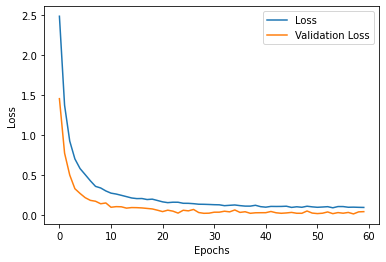

In [170]:
a = optimalModelHist.history['loss']
b = optimalModelHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [171]:
testLoss, testAcc = optimalMod.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 199us/sample - loss: 0.0413 - acc: 0.9841
Test accuracy for this model is 0.9841048717498779


In [172]:
#initialize data for new data frame row
new_row = {'test': ['Final Test: Optimized Model'],
                'training loss': [optimalModelHist.history['loss'][-1]],
              'training acc': [optimalModelHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,LeNet original,0.000319,1.000000,0.854271,0.847741
1,vgg16 reshaped,3.177366,0.043417,3.204896,0.020078
2,1a: 10% DO,0.009809,0.997815,0.554227,0.893893
3,1b: 20% DO,0.015237,0.995338,0.408104,0.914668
4,2a: 10% DO,0.012371,0.996746,0.681100,0.860987
5,2b: 20% DO,0.110056,0.962994,0.332451,0.900725
6,3: 2 DO layers,0.035469,0.988247,0.352887,0.905745
7,4a: remove 120 dense,0.001345,1.000000,1.073727,0.828779
8,4b: remove 84 dense,0.000398,1.000000,0.734963,0.866983
9,"4c: remove 84 dense, add 20% DO",0.076893,0.974746,0.432936,0.900586


In [173]:
# Save the weights
# optimalMod.save_weights('./ASL_CNN_Image_Recognition/optimized_Model_Saved')
# no need to save model twice


In [176]:
# Create a new model instance
model = optimizedModel()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy']) 

# Restore the weights
model.load_weights('./ASL_CNN_Image_Recognition/optimized_Model_Saved')

# Evaluate the model
loss, acc = model.evaluate(cnn_x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7172/7172 [==============================] - 2s 302us/sample - loss: 0.0413 - acc: 0.9841
Restored model, accuracy: 98.41%


There are 114/7172 incorrectly labeled signs


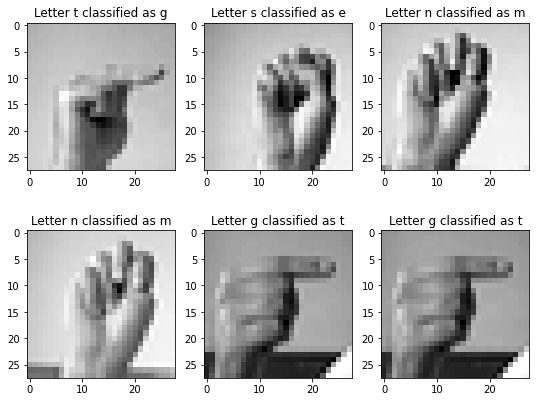

In [285]:
# Shows 6 random incorrect predictions with labels
preds = optimalMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1) # gives the corresponding label
preds_alphabet = numToAlpha(preds)
incorrectPreds = np.argwhere(preds_alphabet != labels_test_alphabet)
print("There are {}/{} incorrectly labeled signs".format(incorrectPreds.shape[0],cnn_x_test.shape[0]))
plt.figure(figsize=(9,7))

for i in range(6):
    plt.subplot(2,3,i+1)
    randIncInd = np.random.choice(incorrectPreds.reshape(-1))
    plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[randIncInd], preds_alphabet[randIncInd]))
    
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

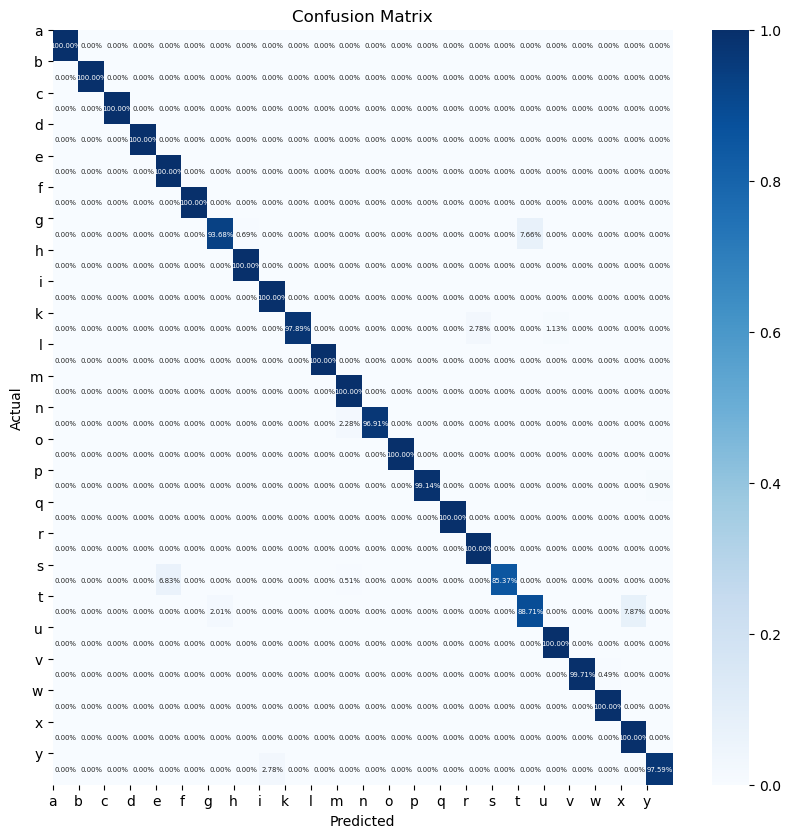

In [293]:
#Plot optimized confusion matrix
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(range(len(alphabet)), alphabet)
plt.yticks(range(len(alphabet)), alphabet, rotation='horizontal')
plt.xlabel("Predicted")
plt.ylabel("Actual")